Project: K-nearest neighbors (KNN)
Construction of a KNN manually
Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
#sample dataset generation
X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=1.3)

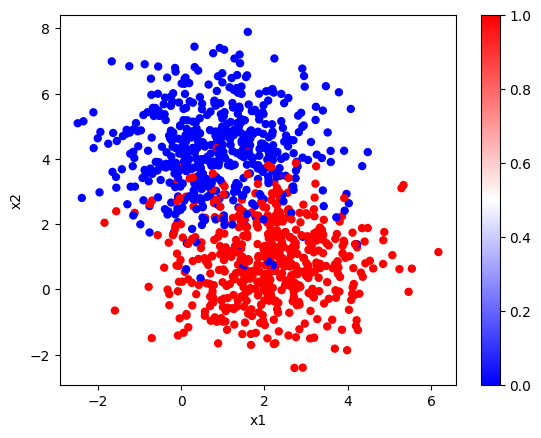

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance +=  (row1[i] - row2[i])**2
        return (distance)**0.5

In [5]:
distance = euclidean_distance(X[0], X)
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
 distances = list()
 for train_row in train:
    dist = euclidean_distance(test_row, train_row)
    distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    #print(distances)
 for i in range(num_neighbors):
    neighbors.append(distances[i][0])
 return neighbors

In [6]:
neighbors = get_neighbors(X, X[0], 3)
neighbors

[array([0.31372224, 3.73429074]),
 array([0.3122234 , 2.76896549]),
 array([0.3164972 , 2.93634319])]

In [7]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Adding a column to the array using concatenate()
Z=np.concatenate([X, y.reshape(-1,1)], axis=1)
prediction = predict_classification(Z, Z[0], 3)
print('Expected %d, Got %d.' % (y[0], prediction))

Expected 0, Got 0.


KNN with sklearn
Training and testing dataset

In [8]:
#Dataset splitting
from sklearn.model_selection import train_test_split
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) # 70% training and 30% test

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
from sklearn import metrics
#Predict Output
predicted= model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9033333333333333


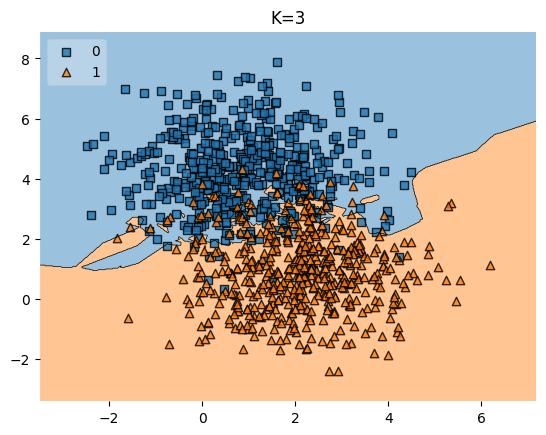

In [11]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(X ,y, clf=model, legend=2)

plt.title('K=3')
plt.show()

**Quiz and their answers:**

1.k-NN algorithm does more computation on test time rather than train time.


Yes




2.Which of the following option is true about KNN algorithm?


It can be used in both classification and regression

3.Which of the following statement is true about KNN algorithm ?


KNN works well with a small number of input variables.


KNN performs much better if all of the data have the same scale.